<a href="https://colab.research.google.com/github/guidotognini/Codecademy/blob/main/Trabalho_Pr%C3%A1tico_Arquiteto_de_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Regressão linear.

O objetivo é prever o nível de colesterol com base no peso.

In [78]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

Carrega os dados clínicos de um arquivo csv

In [79]:
dados_clinicos = pd.read_csv('dados_clinicos.csv', sep= ';')

Visualiza as primeiras 5 linhas do dataframe

In [ ]:
dados_clinicos.head(5)

Obtém o formato do dataframe (número de linhas e colunas)

In [105]:
dados_clinicos.shape

(547, 4)

Calcula estatísticas descritivas para as colunas numéricas do DataFrame

In [ ]:
dados_clinicos.describe()

Verifica se há valores ausentes em cada coluna do dataframe

In [124]:
dados_clinicos.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
dtype: int64

Remove linhas duplicadas no DataFrame

In [109]:
dados_clinicos = dados_clinicos.drop_duplicates()

Preenche valores ausentes na coluna 'peso' com a média dos valores presentes

In [ ]:
dados_clinicos['peso'] = dados_clinicos['peso'].fillna(dados_clinicos['peso'].mean())
dados_clinicos['peso']

In [ ]:
peso = dados_clinicos.iloc[:,1].values
peso

In [ ]:
colesterol = dados_clinicos.iloc[:,2].values
colesterol

Calcula o coeficiente de correlação entre 'peso' e 'colesterol'

In [114]:
np.corrcoef(peso, colesterol)[0, 1]

0.9850073018843013

In [115]:
genero = dados_clinicos.iloc[:,3].values

In [116]:
peso = peso.reshape(-1,1)

In [117]:
peso.shape

(547, 1)

In [118]:
from sklearn.linear_model import LinearRegression
previsao_colesterol = LinearRegression()

In [122]:
previsao_colesterol.fit(peso,colesterol)

LinearRegression()

In [120]:
previsao_colesterol.intercept_

-9.76086059029413

In [121]:
previsao_colesterol.coef_

array([1.2562251])

In [ ]:
previsao_colesterols = previsao_colesterol.predict(peso)
previsao_colesterols

In [98]:
grafico = px.scatter(x = peso.ravel(), y = colesterol, color = genero)
grafico.add_scatter(x = peso.ravel(), y = previsao_colesterols, name = 'previsões')
grafico.show()

In [123]:
nivel_peso = 220
previsao_colesterol.intercept_ + previsao_colesterol.coef_ * nivel_peso


array([266.6086605])

In [100]:
previsao_colesterol.score(peso, colesterol)

0.9702393847653902

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(colesterol, previsao_colesterols)
MSE

45.524835672940625

In [102]:
MAE = mean_absolute_error(colesterol, previsao_colesterols)
MAE

4.981107591146542

In [103]:
RMSE = np.sqrt(MSE)
RMSE

6.747209473029619

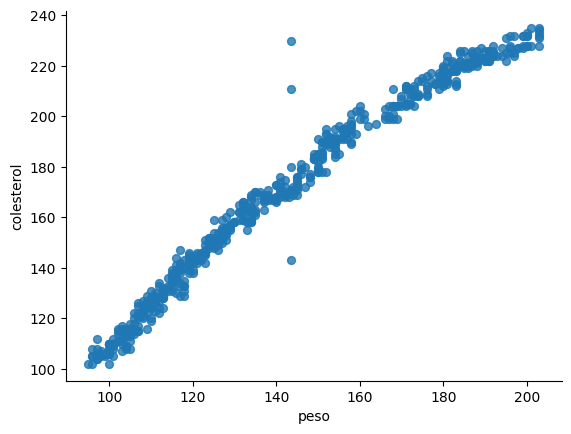

In [104]:
from matplotlib import pyplot as plt
dados_clinicos.head(1000).plot(kind='scatter', x='peso', y='colesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)